# Lab 4

Excercise 4

Import Libraries

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from pandas import DataFrame

Create 2d classification dataset

In [2]:
X, y = make_blobs(n_samples=1000, centers=5, n_features=2, cluster_std=2, random_state=2)

Print X and y

In [3]:
print(X)

[[-0.55697164 -4.84393429]
 [-3.11582813 -5.31130139]
 [-6.34426308  1.27385904]
 ...
 [-1.6466151  -7.4417659 ]
 [-3.15162445 -3.17317325]
 [-0.87977232 -5.89943297]]


In [4]:
print(y)

[2 4 3 1 2 0 2 3 4 3 1 0 2 0 0 3 3 3 2 2 4 0 0 3 2 4 3 4 1 2 0 0 2 3 1 0 1
 4 4 1 3 2 2 3 2 1 0 3 1 0 0 3 0 4 3 3 2 0 2 4 3 1 3 0 1 3 1 1 3 0 2 1 3 4
 2 3 2 1 4 3 3 1 2 3 0 2 3 3 2 2 4 0 3 0 1 3 2 0 4 0 3 3 2 2 1 2 2 1 0 4 1
 2 2 4 0 0 0 0 3 2 1 3 1 4 1 3 4 0 2 0 4 0 0 1 2 1 4 4 2 3 4 1 0 2 4 2 1 1
 2 4 2 2 2 0 1 1 2 2 4 3 1 3 2 4 0 2 0 1 1 2 2 4 4 0 4 3 2 3 3 3 4 1 3 3 3
 2 4 1 0 0 1 3 3 3 1 0 3 3 2 4 4 4 4 3 4 2 2 2 0 3 1 3 4 0 0 3 0 2 0 4 3 4
 4 0 3 1 2 1 4 3 3 2 4 3 4 4 3 0 2 2 1 1 4 3 1 0 2 0 2 2 0 4 2 1 1 0 2 3 2
 1 2 1 2 2 3 1 3 0 4 4 2 0 1 2 0 2 1 3 1 0 4 3 4 1 2 0 2 0 4 4 3 1 4 1 4 2
 3 0 4 0 4 0 3 1 1 3 0 2 1 0 2 2 3 3 3 0 0 2 2 1 1 2 2 1 1 3 3 1 1 1 2 1 1
 4 3 2 0 3 3 1 3 1 0 1 3 1 0 3 3 1 3 1 1 0 3 1 3 1 0 1 2 4 3 0 2 3 3 0 0 0
 3 2 0 1 0 3 2 3 4 0 3 0 4 2 4 1 2 0 4 1 4 4 3 0 0 4 0 4 4 1 4 1 0 3 2 4 3
 3 2 0 1 1 3 3 3 2 0 3 4 0 4 3 4 2 0 0 0 2 2 2 4 3 1 3 3 1 1 1 4 2 0 4 3 3
 4 0 1 1 1 2 1 0 1 0 2 4 2 1 1 0 4 4 3 2 3 0 0 4 3 2 0 3 3 1 0 4 4 0 4 1 1
 0 4 1 0 3 4 0 1 1 1 0 4 

Convert X and y into pandas’s dataframe

In [5]:
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
df.head()

,x,y,label
0,-0.556972,-4.843934,2
1,-3.115828,-5.311301,4
2,-6.344263,1.273859,3
3,5.967619,-2.196274,1
4,-2.510914,-1.569808,2


Scatter plot, dots colored by class value

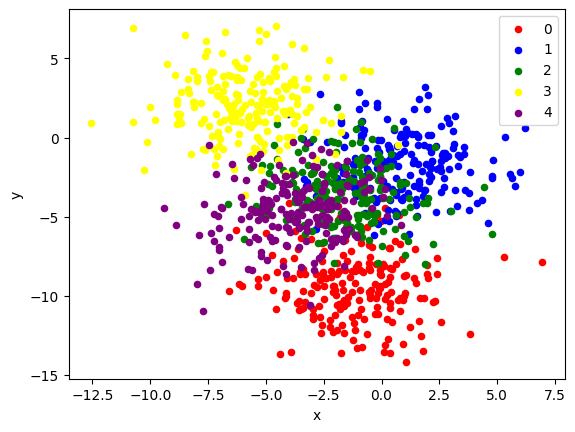

In [6]:
colors = {0:'red', 1:'blue', 2:'green', 3:'yellow', 4:'purple'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    
plt.show()

Convert y to categorical

In [7]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)
print(y)

[[0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]]


Split into train and test

In [8]:
n_train = int(0.9 * X.shape[0])
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

Define model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu'))
model.add(Dense(5, activation='softmax'))
model

Compile the model

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Train the model

In [12]:
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=50, verbose=0)
history

Evaluate the model

In [13]:
train_loss, train_acc = model.evaluate(trainX, trainy, verbose=0)
test_loss, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.758, Test: 0.770


Plot the learning curves of model accuracy

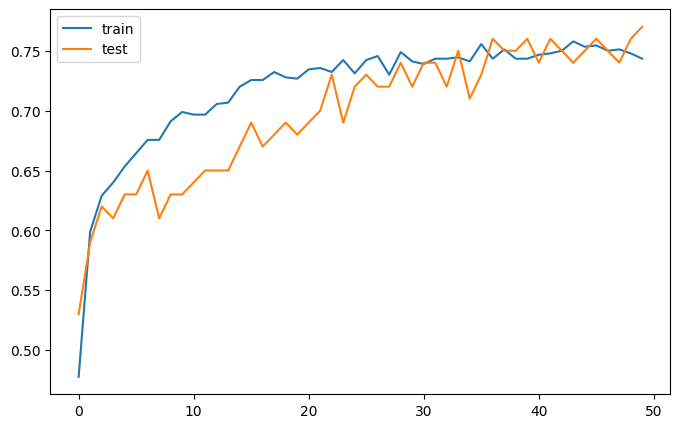

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

## Bagging Ensemble

Let us create extra dataset

In [15]:
dataX, datay = make_blobs(n_samples=55000, centers=5, n_features=2, cluster_std=2, random_state=2)
X, newX = dataX[:5000, :], dataX[5000:, :]
y, newy = datay[:5000], datay[5000:]

In [16]:
dataX.shape, datay.shape

((55000, 2), (55000,))

In [17]:
X.shape, newX.shape

((5000, 2), (50000, 2))

In [18]:
y.shape, newy.shape

((5000,), (50000,))

Create a function

In [19]:
import numpy as np
from sklearn.metrics import accuracy_score

In [20]:
def evaluateModel(trainX, trainy, testX, testy):
    #Convert trainy and testy into categorical
    trainy_enc = to_categorical(trainy)
    testy_enc = to_categorical(testy)
    
    # Create a model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # fit model
    model.fit(trainX, trainy_enc, epochs=50, verbose=0)
    
    # evaluate the model
    test_loss, test_acc = model.evaluate(testX, testy_enc, verbose=0)
    
    # return the model and accuracy of test data
    return model, test_acc
    pass

Create a function to make an ensemble prediction for multi-class classification

In [21]:
def ensemblePredictions(members, testX):
    
    # make predictions
    yhats = [model.predict(testX) for model in members]
    
    yhats = np.array(yhats)
   
    # sum across ensemble members
    summed = np.sum(yhats, axis=0)
    
    # argmax across classes
    result = np.argmax(summed, axis=1)
    
    # return the result
    return result
    pass

Create a function to evaluate a specific number of model in an ensemble

In [22]:
def evaluateNMembers(members, n_members, testX, testy):
    
    # select a subset of members
    subset = members[:n_members]
    
    # make prediction
    yhat = ensemblePredictions(subset, testX)
    
    # calculate accuracy
    return accuracy_score(testy, yhat)
    pass

Create train and test split by using resampling

In [23]:
from sklearn.utils import resample

In [24]:
n_splits = 10
scores, members = list(), list()
for m in range(n_splits):
    
    # select indexes
    ix = [i for i in range(len(X))]
    train_ix = resample(ix, replace=True, n_samples=4500)
    test_ix = [x for x in ix if x not in train_ix]
    
    # select data
    trainX, trainy = X[train_ix], y[train_ix]
    testX, testy = X[test_ix], y[test_ix]
    
    # evaluate model
    model, test_acc = evaluateModel(trainX, trainy, testX, testy)
    print(f'test_acc: {test_acc:.2f}')
    
    scores.append(test_acc)
    members.append(model)

test_acc: 0.75
test_acc: 0.76
test_acc: 0.76
test_acc: 0.77
test_acc: 0.76
test_acc: 0.76
test_acc: 0.77
test_acc: 0.78
test_acc: 0.77
test_acc: 0.78


Estimated Accuracy

In [25]:
print(f'Estimated Accuracy {np.mean(scores): .2f} ({np.std(scores): .3f})')

Estimated Accuracy  0.77 ( 0.009)


Evaluate different numbers of ensembles

In [26]:
single_scores, ensemble_scores = list(), list()
for i in range(1, n_splits+1):
    ensemble_score = evaluateNMembers(members, i, newX, newy)
    
    newy_enc = to_categorical(newy)
    
    _, single_score = members[i-1].evaluate(newX, newy_enc, verbose=0)
    
    print(f'{i}: single={single_score: .2f}, ensemble={ensemble_score: .2f}')
    
    ensemble_scores.append(ensemble_score)
    single_scores.append(single_score)
    pass

1563/1563 [==============================] - 1s 685us/step
1: single= 0.76, ensemble= 0.76
1563/1563 [==============================] - 1s 593us/step
2: single= 0.76, ensemble= 0.76
1563/1563 [==============================] - 1s 644us/step
3: single= 0.76, ensemble= 0.76
1563/1563 [==============================] - 1s 642us/step
4: single= 0.76, ensemble= 0.76
1563/1563 [==============================] - 1s 614us/step
5: single= 0.76, ensemble= 0.76
1563/1563 [==============================] - 1s 661us/step
6: single= 0.76, ensemble= 0.76
1563/1563 [==============================] - 1s 587us/step
7: single= 0.76, ensemble= 0.76
1563/1563 [==============================] - 1s 597us/step
8: single= 0.76, ensemble= 0.76
1563/1563 [==============================] - 1s 614us/step
9: single= 0.76, ensemble= 0.76
1563/1563 [==============================] - 1s 616us/step
10: single= 0.76, ensemble= 0.76


In [27]:
print(ensemble_scores)
print(single_scores)

[0.75762, 0.7586, 0.75848, 0.75874, 0.75876, 0.75896, 0.75882, 0.75892, 0.759, 0.75938]
[0.7576199769973755, 0.7574800252914429, 0.7583400011062622, 0.7577199935913086, 0.7571799755096436, 0.7579399943351746, 0.7585399746894836, 0.7574399709701538, 0.7586399912834167, 0.7578799724578857]


Plot score vs number of ensemble members

Accuracy  0.76 ( 0.000)


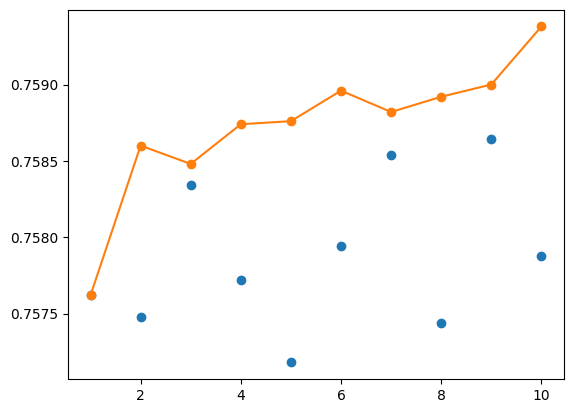

In [28]:
print(f'Accuracy {np.mean(single_scores): .2f} ({np.std(single_scores): .3f})')
x_axis = [i for i in range(1, n_splits+1)]
plt.plot(x_axis, single_scores, marker='o', linestyle='None')
plt.plot(x_axis, ensemble_scores, marker='o')
plt.show()

In [31]:
# make predictions
yhats = [model.predict(testX) for model in members]

yhats = np.array(yhats)

# sum across ensemble members
summed = np.sum(yhats, axis=0)

# argmax across classes
result = np.argmax(summed, axis=1)

64/64 [==============================] - 0s 753us/step
